# 1.3.1
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.


Расстояния между точкой 0 и 1:
  Евклидово:          5.196
  Квадрат евклидова:  27.000
  Взвешенное евклидово: 5.196
  Хеммингово:         9.000
  Чебышёва:           3.000

Расстояния между точкой 0 и 2:
  Евклидово:          6.164
  Квадрат евклидова:  38.000
  Взвешенное евклидово: 6.164
  Хеммингово:         8.000
  Чебышёва:           6.000

Расстояния между точкой 0 и 3:
  Евклидово:          2.236
  Квадрат евклидова:  5.000
  Взвешенное евклидово: 2.236
  Хеммингово:         3.000
  Чебышёва:           2.000

Расстояния между точкой 1 и 2:
  Евклидово:          6.403
  Квадрат евклидова:  41.000
  Взвешенное евклидово: 6.403
  Хеммингово:         11.000
  Чебышёва:           4.000

Расстояния между точкой 1 и 3:
  Евклидово:          3.742
  Квадрат евклидова:  14.000
  Взвешенное евклидово: 3.742
  Хеммингово:         6.000
  Чебышёва:           3.000

Расстояния между точкой 2 и 3:
  Евклидово:          4.583
  Квадрат евклидова:  21.000
  Взвешенное евклидово: 4.583
  Хемм

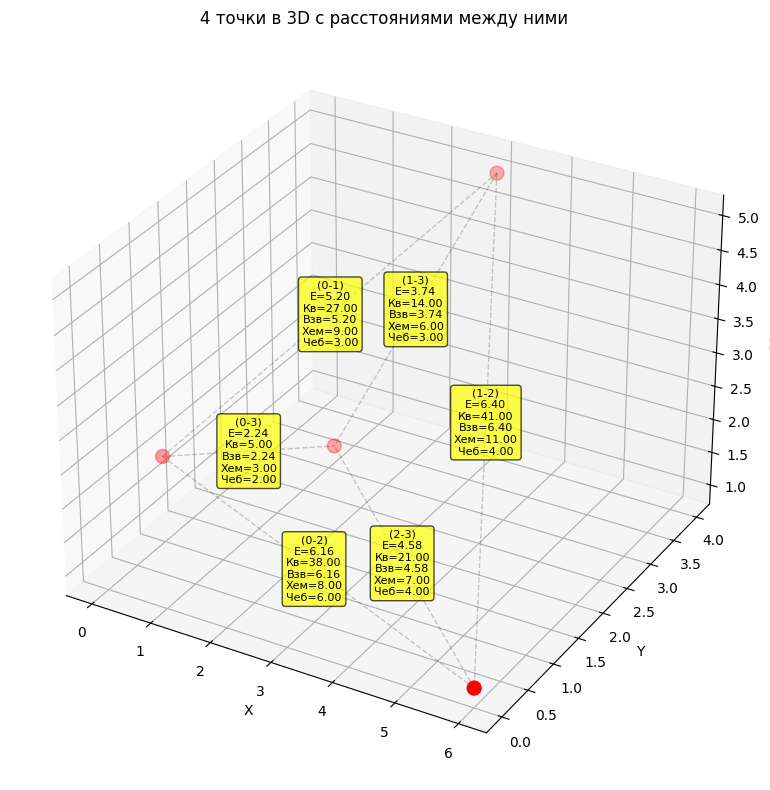

In [ ]:
from numpy import array, sqrt, abs, max as np_max
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Задаём 4 точки в 3D пространстве
P = array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 0, 1],
    [2, 2, 2]
])

# Функции для расчёта разных метрик
def euclid(a, b):
    return sqrt(((a - b) ** 2).sum())

def sq_euclid(a, b):
    return ((a - b) ** 2).sum()

def weighted_euclid(a, b, weights):
    return sqrt((weights * (a - b) ** 2).sum())

def hamming(a, b):
    return abs(a - b).sum()

def chebyshev(a, b):
    return np_max(abs(a - b))

# Веса для взвешенного евклидова (можно задать свои)
w = array([1.0, 1.0, 1.0])

# Создаём 3D-график
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Рисуем точки
ax.scatter(P[:, 0], P[:, 1], P[:, 2], s=100, c='red', zorder=5)

# Для каждой пары точек:
n = len(P)
for i in range(n):
    for j in range(i + 1, n):
        # Соединяем точки линией
        ax.plot([P[i, 0], P[j, 0]], 
                [P[i, 1], P[j, 1]], 
                [P[i, 2], P[j, 2]], 
                'k--', alpha=0.2, linewidth=1)
        
        # Вычисляем все расстояния
        d_euclid    = euclid(P[i], P[j])
        d_sq        = sq_euclid(P[i], P[j])
        d_weighted  = weighted_euclid(P[i], P[j], w)
        d_hamming   = hamming(P[i], P[j])
        d_chebyshev = chebyshev(P[i], P[j])
        
        mid_x = (P[i, 0] + P[j, 0]) / 2
        mid_y = (P[i, 1] + P[j, 1]) / 2
        mid_z = (P[i, 2] + P[j, 2]) / 2
        
        label = f"({i}-{j})\nЕ={d_euclid:.2f}\nКв={d_sq:.2f}\nВзв={d_weighted:.2f}\nХем={d_hamming:.2f}\nЧеб={d_chebyshev:.2f}"
        
        ax.text(mid_x, mid_y, mid_z, label, fontsize=8, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

        # Печатаем расстояния в консоль
        print(f"\nРасстояния между точкой {i} и {j}:")
        print(f"  Евклидово:          {d_euclid:.3f}")
        print(f"  Квадрат евклидова:  {d_sq:.3f}")
        print(f"  Взвешенное евклидово: {d_weighted:.3f}")
        print(f"  Хеммингово:         {d_hamming:.3f}")
        print(f"  Чебышёва:           {d_chebyshev:.3f}")

# Оформление графика
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('4 точки в 3D с расстояниями между ними')
plt.tight_layout()
plt.show()

# 1.3.2
Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания
необходимо использовать функцию arange.

In [17]:
from numpy import arange, tile

# Создаём строку [0,1,2,3,4] и повторяем 5 раз
matrix = tile(arange(5), (5, 1))
print(matrix)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


------------------------------------------------------------

# 2.3.1
Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты.

k = 1 → точность = 1.0000
k = 5 → точность = 1.0000
k = 10 → точность = 0.9565


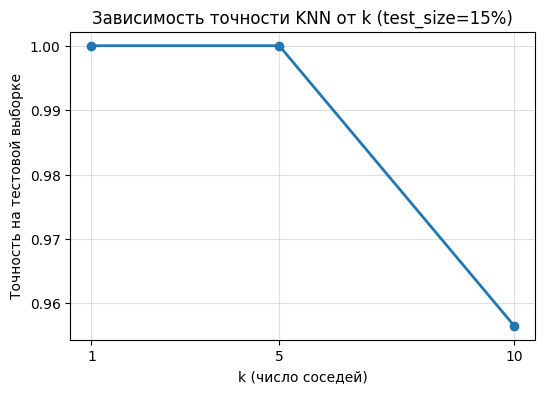

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/akmand/datasets/master/iris.csv")
X = df.iloc[:, :-1]  # признаки
y = df.iloc[:, -1]   # целевой признак (последний столбец)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

k_values = [1, 5, 10]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k} → точность = {acc:.4f}")

# График
plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='-', linewidth=2)
plt.xlabel("k (число соседей)")
plt.ylabel("Точность на тестовой выборке")
plt.title("Зависимость точности KNN от k (test_size=15%)")
plt.grid(True, alpha=0.4)
plt.xticks(k_values)
plt.show()

------------------------------------------------------------

# 3.3.2
Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков

In [ ]:
import pandas as pd

people = pd.DataFrame({
    'eye_color': ['blue', 'brown', 'green', 'blue', 'hazel'],
    'hair_color': ['blond', 'black', 'red', 'blond', 'brown'],
    'gender': ['M', 'F', 'M', 'F', 'M']
})

feature_matrix = pd.get_dummies(people, dtype=int)

print("Исходные данные:")
print(people)
print("\nМатрица признаков (one-hot):")
print(feature_matrix.values)

Исходные данные:
  eye_color hair_color gender
0      blue      blond      M
1     brown      black      F
2     green        red      M
3      blue      blond      F
4     hazel      brown      M

Матрица признаков (one-hot):
[[1 0 0 0 0 1 0 0 0 1]
 [0 1 0 0 1 0 0 0 1 0]
 [0 0 1 0 0 0 0 1 0 1]
 [1 0 0 0 0 1 0 0 1 0]
 [0 0 0 1 0 0 1 0 0 1]]
